# Machine Learning on Graphs

# PageRank

In this lab, you will learn to use and interpret [PageRank](https://en.wikipedia.org/wiki/PageRank) for graph analysis.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, linear_graph
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following real graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (weighted graph)
* WikiVitals (directed graph + bipartite graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## 1. Linear graph

We start with the following simple graph:

In [5]:
n = 10
graph = linear_graph(n, metadata=True)
adjacency = graph.adjacency
position = graph.position

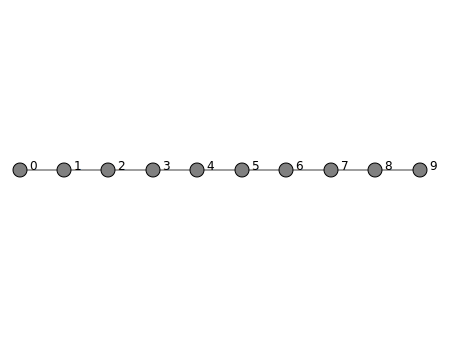

In [6]:
image = svg_graph(adjacency, position, names=np.arange(n))
SVG(image)

## To do

* Q1. What are the two best ranked nodes?<br> Try with different values of $\alpha \in [0,1)$ and interpret the results.
* Q2. What is the **exact** PageRank vector when $\alpha=1$?<br> You need to calculate it!
* Q3. Compute the Personalized PageRank vector starting from nodes 0 and 2.<br> What is the best ranked node?

#### Question 1

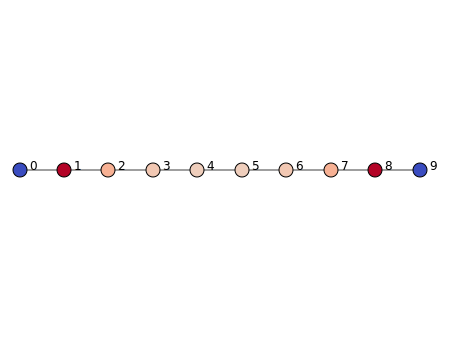

In [7]:
pagerank = PageRank(damping_factor=0.5, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)
SVG(image)

In [8]:
scores_top = top_k(scores, k=2)
scores_top

array([1, 8])

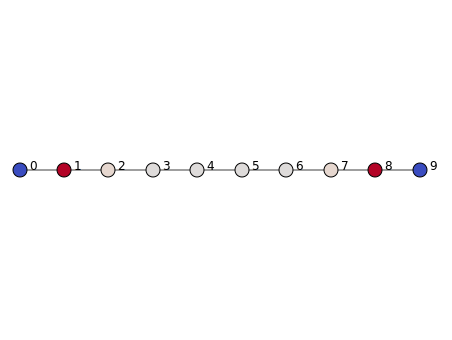

In [9]:
pagerank2 = PageRank(damping_factor=0.1, solver='lanczos')
scores2 = pagerank2.fit_transform(adjacency)
image2 = svg_graph(adjacency, position, names=np.arange(n), scores=scores2)
SVG(image2)

In [10]:
scores_top2 = top_k(scores2, k=2)
scores_top2

array([1, 8])

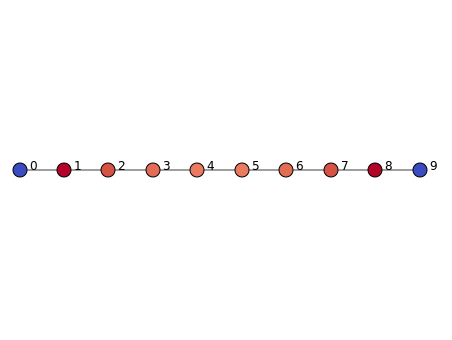

In [11]:
pagerank3 = PageRank(damping_factor=0.9, solver='lanczos')
scores3 = pagerank3.fit_transform(adjacency)
image3 = svg_graph(adjacency, position, names=np.arange(n), scores=scores3)
SVG(image3)

In [12]:
scores_top3 = top_k(scores3, k=2)
scores_top3

array([1, 8])

Plus le damping factor est haut plus le surfeur sera discipliné à avancer sur le graphe de manière logique et plus le damping factor sera bas plus le surfeur utilisera des sauts aléatoires.

#### Question 2

In [14]:
degrees = adjacency.dot(np.ones(n))
diag = sparse.diags(degrees,format='csr')
diag.data = 1/diag.data
diag.todense()

matrix([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

#### Question 3

## 2. Openflights


We now work on Openflights, the graph of daily flights between interational airports.

In [38]:
graph = openflights

In [39]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

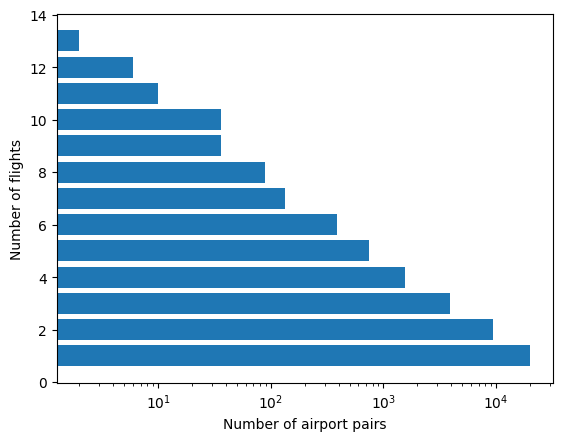

In [40]:
# daily number of flights
x, y = np.unique(adjacency.data, return_counts=True)
plt.barh(x, y)
plt.xscale('log')
plt.xlabel('Number of airport pairs')
plt.ylabel('Number of flights')
plt.show()

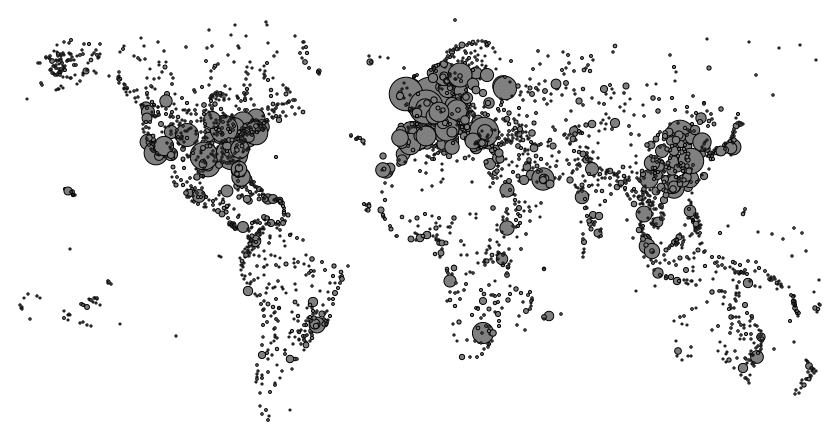

In [45]:
# edges not displayed
# node size = daily number of flights
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## To do

* Show the same world map with PageRank scores.<br>
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Show the world map with Personalized PageRank scores, starting from **Beijing** international airport.
* List the corresponding 10 best ranked airports.

In [ ]:
n = len(names)
# to be modified
scores = np.ones(n)

In [ ]:
image = svg_graph(adjacency, position, width=800, height=400, scores=np.log(scores), node_order=np.argsort(scores), display_node_weight=True, display_edges=False)
SVG(image)

## 3. Wikivitals

We now consider Wikivitals, the graph of hyperlinks between [vital articles](https://en.wikipedia.org/wiki/Wikipedia:Vital_articles/Level/4) of Wikipedia.

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

* List the 10 best ranked articles.
* Compare with the 10 articles of highest out-degrees and the 10 articles of highest in-degrees.<br>Interpret the results.

## To do
* List the 10 best ranked articles for the Personalized PageRank starting from **Pablo Picasso**. 
* List the 10 best ranked articles for the Personalized PageRank starting from **Cat** and **Dog**.
* To get more specific results, propose another method based on the difference between 2 PageRank vectors.

## To do

Propose a method to get the 10 most representative articles of each category (Arts, Biology, ...)

In [ ]:
labels = graph.labels
names_labels = graph.names_labels

In [ ]:
print(names_labels)

## To do

Compare previous results to those obtained with the textual content of articles. 

In [ ]:
biadjacency = graph.biadjacency
words = graph.names_col